## **실습 진행 부분**

## **실습을 진행하셔야 과제 진행을 할 수 있습니다.**


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms 

In [2]:
# 데이터셋 다운 및 로드

transform = transforms.Compose(
    [transforms.ToTensor()]
)

batch_size = 4

cifar_trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                              download=True, transform=transform)
cifar_trainloader = torch.utils.data.DataLoader(cifar_trainset, batch_size=batch_size,
                                           shuffle=True, num_workers=2)

cifar_testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                             download=True, transform=transform)
cifar_testloader = torch.utils.data.DataLoader(cifar_testset, batch_size=batch_size,
                                               shuffle=False, num_workers=2)
cifar_classes = ('plane', 'car', 'bird', 'cat',
                 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
# MNIST 데이터셋 다운 및 로드

transform = transforms.Compose(
    [transforms.ToTensor()]
)

batch_size = 4

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                            download=True, transform=transform)
mnist_trainloader = torch.utils.data.DataLoader(mnist_trainset, batch_size=batch_size,
                                                shuffle=True, num_workers=2)

mnist_testset = torchvision.datasets.MNIST(root='./data', train=False,
                                           download=True, transform=transform)
mnist_testloader = torch.utils.data.DataLoader(mnist_testset, batch_size=batch_size,
                                               shuffle=False, num_workers=2)

mnist_classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

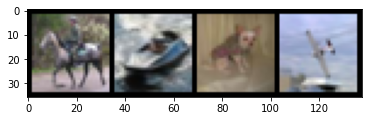

horse ship  dog   plane
(3, 32, 32)


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(cifar_trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{cifar_classes[labels[j]]:5s}' for j in range(batch_size)))

print(images[0].numpy().shape)

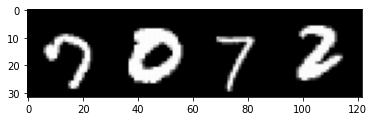

7     0     7     2    
(1, 28, 28)


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 이미지를 보여주기 위한 함수
def imshow(img):
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

# 학습용 이미지를 무작위로 가져오기
dataiter = iter(mnist_trainloader)
images, labels = dataiter.next()

# 이미지 보여주기
imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{str(mnist_classes[labels[j]]):5s}' for j in range(batch_size)))

print(images[0].numpy().shape)


In [6]:
import torch.nn as nn
import torch.nn.functional as F

class FullyConnectedNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(28 * 28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
    # 3차원의 이미지 -> 1차원
    x = x.flatten(1)
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.fc3(x)
    x = F.softmax(x, dim=-1)

    return x

model = FullyConnectedNetwork()

In [7]:
import torch.optim as optim

# 손실함수 선언
criterion = nn.CrossEntropyLoss()

# 옵티마이저 선언
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(2): # 데이터셋을 수차례 반복
  running_loss = 0.0

  for i, data in enumerate(mnist_trainloader, 0):
    # [inputs, labels]의 목록인 data로부터 입력을 받은 후
    inputs, labels = data

    # 변화도(Gradient) 매개변수를 0으로 만듦
    optimizer.zero_grad()

    # 순전파 + 역전파 + 최적화
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # 통계 출력
    running_loss += loss.item()
    if i % 2000 == 1999: 
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.232
[1,  4000] loss: 1.863
[1,  6000] loss: 1.692
[1,  8000] loss: 1.628
[1, 10000] loss: 1.598
[1, 12000] loss: 1.588
[1, 14000] loss: 1.583
[2,  2000] loss: 1.574
[2,  4000] loss: 1.562
[2,  6000] loss: 1.565
[2,  8000] loss: 1.561
[2, 10000] loss: 1.561
[2, 12000] loss: 1.557
[2, 14000] loss: 1.557
Finished Training


In [9]:
correct = 0
total = 0

# 학습 중이 아니므로, 출력에 대한 변화도 계산할 필요 X
with torch.no_grad():
  for data in mnist_testloader:
    images, labels = data
    # 신경망에 이미지를 통과시켜 출력 계산
    outputs = model(images)
    # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 91 %


In [10]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in mnist_classes}
total_pred = {classname: 0 for classname in mnist_classes}

# 변화도는 여전히 필요 X
with torch.no_grad():
  for data in mnist_testloader:
    images, labels = data
    outputs = model(images)
    _, predictions = torch.max(outputs, 1)
    # 각 분류별로 올바른 예측 수 모름
    for label, prediction in zip(labels, predictions):
      if label == prediction:
        correct_pred[mnist_classes[label]] += 1
      total_pred[mnist_classes[label]] += 1

# 각 분류별 정확도(accuracy) 출력
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {str(classname):5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 97.6 %
Accuracy for class: 1     is 97.4 %
Accuracy for class: 2     is 88.8 %
Accuracy for class: 3     is 90.5 %
Accuracy for class: 4     is 94.3 %
Accuracy for class: 5     is 81.5 %
Accuracy for class: 6     is 93.7 %
Accuracy for class: 7     is 93.4 %
Accuracy for class: 8     is 89.8 %
Accuracy for class: 9     is 87.2 %


In [11]:
import torch.optim as optim

gpu_model = FullyConnectedNetwork()

# 손실함수 선언
criterion = nn.CrossEntropyLoss()

# 옵티마이저 선언
optimizer = optim.SGD(gpu_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):  # 데이터셋을 수차례 반복
  running_loss = 0.0

  for i, data in enumerate(mnist_trainloader, 0):
    # [inputs, labels]의 목록인 data로부터 입력을 받음
    inputs, labels = data[0].to('cuda'), data[1].to('cuda')

    # 변화도(Gradiant) 매개변수를 0으로 만듦
    optimizer.zero_grad()

    # 순전파 + 역전파 + 최적화
    gpu_model = gpu_model.to('cuda')
    outputs = gpu_model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # 통계 출력
    running_loss += loss.item()
    if i % 2000 == 1999:
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.211
[1,  4000] loss: 1.856
[1,  6000] loss: 1.698
[1,  8000] loss: 1.662
[1, 10000] loss: 1.629
[1, 12000] loss: 1.596
[1, 14000] loss: 1.582
[2,  2000] loss: 1.580
[2,  4000] loss: 1.569
[2,  6000] loss: 1.563
[2,  8000] loss: 1.567
[2, 10000] loss: 1.561
[2, 12000] loss: 1.557
[2, 14000] loss: 1.555
Finished Training


In [12]:
correct = 0
total = 0

for data in mnist_testloader:
  images, labels = data[0].to('cuda'), data[1].to('cuda')

  # 신경망에 이미지를 통과시켜 출력 계산
  gpu_model = gpu_model.to('cuda')
  outputs = gpu_model(images)

  # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택
  _, predicted = torch.max(outputs.data, 1)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 91 %


In [13]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in mnist_classes}
total_pred = {classname: 0 for classname in mnist_classes}

for data in mnist_testloader:
  images, labels = data[0].to('cuda'), data[1].to('cuda')

  gpu_model = gpu_model.to('cuda')
  outputs = gpu_model(images)
  _, predictions = torch.max(outputs, 1)

  # 각 분류별로 올바른 예측 수 모름
  for label, prediction in zip(labels, predictions):
    if label == prediction:
      correct_pred[mnist_classes[label]] += 1
    total_pred[mnist_classes[label]] += 1

# 각 분류별 정확도(accuracy) 출력
for classname, correct_count in correct_pred.items():
  accuracy = 100 * float(correct_count) / total_pred[classname]
  print(f'Accuracy for class: {str(classname):5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 97.7 %
Accuracy for class: 1     is 97.9 %
Accuracy for class: 2     is 89.1 %
Accuracy for class: 3     is 90.9 %
Accuracy for class: 4     is 95.9 %
Accuracy for class: 5     is 82.2 %
Accuracy for class: 6     is 93.8 %
Accuracy for class: 7     is 91.9 %
Accuracy for class: 8     is 89.5 %
Accuracy for class: 9     is 84.5 %


## **과제 수행 부분** 

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class ConvolutionalNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    # TODO Convolution Layer 설정

    # layer1 - input_channel : 3(RGB), output_channel : 64
    self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1, stride=1)
    # layer2 - input_channel : 64, output_channel : 128
    self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1, stride=1)

    # max pooling
    self.pool = nn.MaxPool2d(2, 2)

    self.fc1 = nn.Linear(128 * 8 * 8, 512)
    self.fc2 = nn.Linear(512, 256)
    # 10개의 class를 예측해야 하기 때문에 마지막은 10차원
    self.fc3 = nn.Linear(256, 10)

  def forward(self, x):
      x = F.relu(self.conv1(x)) # convolution
      x = self.pool(x)  # max pooling
      x = F.relu(self.conv2(x))  # convolution
      x = self.pool(x)  # max pooling

      x = x.flatten(1) # 1차원으로 펼치기

      x = F.relu(self.fc1(x))
      x = F.relu(self.fc2(x))
      x = self.fc3(x)

      return x

homework_model = ConvolutionalNetwork()

In [15]:
gpu_model = homework_model
# 손실함수 선언
criterion = nn.CrossEntropyLoss()
# 옵티마이저 선언
optimizer = optim.SGD(gpu_model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(2):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(cifar_trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to('cuda'), data[1].to('cuda')

        # 변화도(Gradient) 매개변수를 0으로 만들고
        optimizer.zero_grad()

        # 순전파 + 역전파 + 최적화를 한 후
        gpu_model = gpu_model.to('cuda')
        outputs = gpu_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.210
[1,  4000] loss: 1.914
[1,  6000] loss: 1.691
[1,  8000] loss: 1.545
[1, 10000] loss: 1.452
[1, 12000] loss: 1.367
[2,  2000] loss: 1.284
[2,  4000] loss: 1.212
[2,  6000] loss: 1.172
[2,  8000] loss: 1.124
[2, 10000] loss: 1.087
[2, 12000] loss: 1.045
Finished Training


In [16]:
correct = 0
total = 0

for data in cifar_testloader:
    images, labels = data[0].to('cuda'), data[1].to('cuda')
    # 신경망에 이미지를 통과시켜 출력을 계산합니다
    gpu_model = gpu_model.to('cuda')
    outputs = gpu_model(images)
    # 가장 높은 값(energy)를 갖는 분류(class)를 정답으로 선택하겠습니다
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 62 %


In [17]:
# 각 분류(class)에 대한 예측값 계산을 위해 준비
correct_pred = {classname: 0 for classname in cifar_classes}
total_pred = {classname: 0 for classname in cifar_classes}

for data in cifar_testloader:
    images, labels = data[0].to('cuda'), data[1].to('cuda')

    gpu_model = gpu_model.to('cuda')
    outputs = gpu_model(images)
    _, predictions = torch.max(outputs, 1)
        # 각 분류별로 올바른 예측 수를 모읍니다
    for label, prediction in zip(labels, predictions):
        if label == prediction:
            correct_pred[cifar_classes[label]] += 1
        total_pred[cifar_classes[label]] += 1


# 각 분류별 정확도(accuracy)를 출력합니다
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 57.2 %
Accuracy for class: car   is 63.9 %
Accuracy for class: bird  is 47.1 %
Accuracy for class: cat   is 36.4 %
Accuracy for class: deer  is 69.7 %
Accuracy for class: dog   is 71.2 %
Accuracy for class: frog  is 64.5 %
Accuracy for class: horse is 54.2 %
Accuracy for class: ship  is 81.9 %
Accuracy for class: truck is 78.7 %
